In [87]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline


In [88]:
data = pd.read_csv('123.csv')

In [89]:
data.head()

,Salary,Cars,Home,Savings
0,90,19,83,289
1,95,35,134,1130
2,99,46,110,583
3,130,24,69,1049
4,126,42,153,612


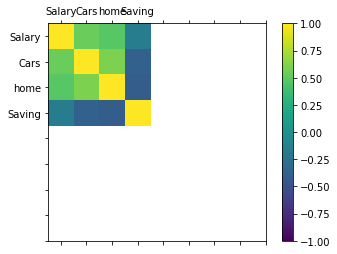

In [90]:
import numpy 
names=['Salary','Cars','home','Saving']
correlations = data.corr() #计算变量之间的相关系数矩阵 # plot correlation matrix 
fig = plt.figure() #调用figure创建一个绘图对象 
ax = fig.add_subplot(111) 
cax = ax.matshow(correlations, vmin=-1, vmax=1) #绘制热力图，从-1到1 
fig.colorbar(cax) #将matshow生成热力图设置为颜色渐变条 
ticks = numpy.arange(0,9,1) #生成0-9，步长为1 
ax.set_xticks(ticks) #生成刻度 
ax.set_yticks(ticks) 
ax.set_xticklabels(names) #生成x轴标签 
ax.set_yticklabels(names) 
plt.show()


## 

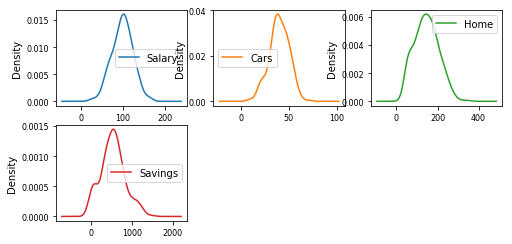

In [91]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False,fontsize=8,figsize=(8,6))
plt.show()

In [92]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [95]:

x_train = data[['Salary','Cars','Home']]

y_train = data['Savings']


x_train

,Salary,Cars,Home
0,90,19,83
1,95,35,134
2,99,46,110
3,130,24,69
4,126,42,153
5,73,35,127
6,111,34,98
7,140,53,191
8,52,33,119
9,99,50,147


In [64]:
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
x_train = ss_X.fit_transform(x_train)
y_train = ss_X.fit_transform(y_train)

c:\users\zhaofeng shang\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [96]:
ols = linear_model.LinearRegression()
model = ols.fit(x_train, y_train)

In [97]:
pd.DataFrame({"columns":list(x_train.columns), "coef":list(model.coef_.T)})

,coef,columns
0,1.552056,Salary
1,-7.619483,Cars
2,-1.594908,Home


In [42]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
model = SGDRegressor(loss='squared_loss', penalty='l2', max_iter=5)
params = {'penalty':['none','l2','l1'],
          'alpha':[1e-4, 2e-4, 5e-4, 1e-3, 2e-3, 5e-3, 1e-2, 2e-2, 5e-2, 0.1]}
gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  scoring='neg_mean_squared_error',
                  n_jobs=1,
                  cv=5,
                  verbose=3)

In [43]:
gs.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] alpha=0.0001, penalty=none ......................................
[CV]  alpha=0.0001, penalty=none, score=-3.0897887820358846e+27, total=   0.0s
[CV] alpha=0.0001, penalty=none ......................................
[CV]  alpha=0.0001, penalty=none, score=-6.556984571001504e+26, total=   0.0s
[CV] alpha=0.0001, penalty=none ......................................
[CV]  alpha=0.0001, penalty=none, score=-2.6310460116893674e+26, total=   0.0s
[CV] alpha=0.0001, penalty=none ......................................
[CV]  alpha=0.0001, penalty=none, score=-9.748991504905046e+27, total=   0.0s
[CV] alpha=0.0001, penalty=none ......................................
[CV]  alpha=0.0001, penalty=none, score=-4.802563030000644e+25, total=   0.0s
[CV] alpha=0.0001, penalty=l2 ........................................
[CV]  alpha=0.0001, penalty=l2, score=-6.39044273567977e+27, total=   0.0s
[CV] alpha=0.0001, penalty=l2 ...............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  alpha=0.001, penalty=l1, score=-2.076897052180543e+27, total=   0.0s
[CV] alpha=0.001, penalty=l1 .........................................
[CV]  alpha=0.001, penalty=l1, score=-2.957951520445809e+27, total=   0.0s
[CV] alpha=0.001, penalty=l1 .........................................
[CV]  alpha=0.001, penalty=l1, score=-1.5710340178024008e+27, total=   0.0s
[CV] alpha=0.001, penalty=l1 .........................................
[CV]  alpha=0.001, penalty=l1, score=-4.29062373667577e+27, total=   0.0s
[CV] alpha=0.001, penalty=l1 .........................................
[CV]  alpha=0.001, penalty=l1, score=-2.189318498784063e+25, total=   0.0s
[CV] alpha=0.002, penalty=none .......................................
[CV]  alpha=0.002, penalty=none, score=-4.708375697684824e+26, total=   0.0s
[CV] alpha=0.002, penalty=none .......................................
[CV]  alpha=0.002, penalty=none, score=-3.545358380344173e+27, total=   0.0s
[CV] alpha=0.002, penalty=none ..............

[CV] alpha=0.05, penalty=l2 ..........................................
[CV]  alpha=0.05, penalty=l2, score=-2.4768591119763318e+26, total=   0.0s
[CV] alpha=0.05, penalty=l2 ..........................................
[CV]  alpha=0.05, penalty=l2, score=-1.430958391322806e+27, total=   0.0s
[CV] alpha=0.05, penalty=l2 ..........................................
[CV]  alpha=0.05, penalty=l2, score=-1.1479307184889216e+27, total=   0.0s
[CV] alpha=0.05, penalty=l1 ..........................................
[CV]  alpha=0.05, penalty=l1, score=-2.4509592061814192e+25, total=   0.0s
[CV] alpha=0.05, penalty=l1 ..........................................
[CV]  alpha=0.05, penalty=l1, score=-7.202614303201897e+26, total=   0.0s
[CV] alpha=0.05, penalty=l1 ..........................................
[CV]  alpha=0.05, penalty=l1, score=-4.746063504966628e+26, total=   0.0s
[CV] alpha=0.05, penalty=l1 ..........................................
[CV]  alpha=0.05, penalty=l1, score=-1.8639889303730156e

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['none', 'l2', 'l1'], 'alpha': [0.0001, 0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=3)

In [44]:
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
bsp = gs.best_estimator_.get_params()  # the dict of parameters with best score
    
for param_name in sorted(bsp.keys()):
    print("\t%s: %s" % (param_name, bsp[param_name]))

Best score: -304930796059194379919687680.000
Best parameters set:
	alpha: 0.05
	average: False
	epsilon: 0.1
	eta0: 0.01
	fit_intercept: True
	l1_ratio: 0.15
	learning_rate: invscaling
	loss: squared_loss
	max_iter: 5
	n_iter: None
	penalty: l1
	power_t: 0.25
	random_state: None
	shuffle: True
	tol: None
	verbose: 0
	warm_start: False


In [45]:
print(gs.best_params_)

{'alpha': 0.05, 'penalty': 'l1'}


In [47]:
model1 = SGDRegressor(**bsp)

In [48]:
model1.fit(x_train, y_train)

SGDRegressor(alpha=0.05, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=5, n_iter=None, penalty='l1',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [50]:
pd.DataFrame({"columns":list(x_train.columns), "coef":list(model1.coef_.T)})

,coef,columns
0,-2.465696e+10,Salary
1,-7.303677e+10,Cars
2,2.414154e+11,Home
